<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment (Problem 1) - Food Classifying Model (Individual)</h2><h3>AY2019/20 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import keras
import os
from keras import layers, models, optimizers, regularizers
from keras.applications import InceptionV3, ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Step 1: Data Loading

### Data Loading For Most Models

In [2]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")
img_size = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


###### Data Loading For ResNet50

In [2]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")
img_size = 150

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [3]:
# Remove before submission
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


## Step 2:  Develop the Image Classification Models

### Model #1

#### Baseline Model

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 32)        9248      
__________

In [13]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/40
375/375 [==============================] - 78s 209ms/step - loss: 2.2712 - acc: 0.1632 - val_loss: 2.0894 - val_acc: 0.2430
Epoch 2/40
375/375 [==============================] - 73s 195ms/step - loss: 2.0873 - acc: 0.2419 - val_loss: 1.9530 - val_acc: 0.3035
Epoch 3/40
375/375 [==============================] - 75s 200ms/step - loss: 2.0247 - acc: 0.2611 - val_loss: 1.9553 - val_acc: 0.2885
Epoch 4/40
375/375 [==============================] - 74s 198ms/step - loss: 1.9736 - acc: 0.2884 - val_loss: 1.8427 - val_acc: 0.3500
Epoch 5/40
375/375 [==============================] - 78s 207ms/step - loss: 1.9461 - acc: 0.3111 - val_loss: 1.8168 - val_acc: 0.3695
Epoch 6/40
375/375 [==============================] - 77s 204ms/step - loss: 1.8922 - acc: 0.3329 - val_loss: 1.7364 - val_acc: 0.3895
Epoch 7/40
375/375 [==============================] - 77s 205ms/step - loss: 1.8380 - acc: 0.3580 - val_loss: 1.7526 - val_acc: 0.4110
Epoch 8/40
375/375 [==============================] - 7

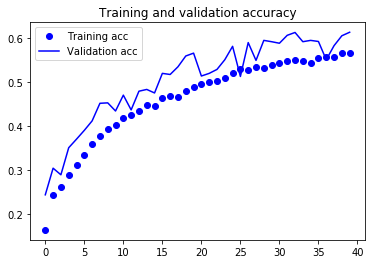

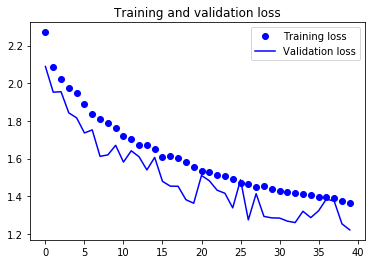

In [14]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Overfitted Model

In [8]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.002), bias_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(192, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.002), bias_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(384, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(lr=1.6, rho=0.92),
              metrics=['acc'])

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       110720    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_____________________

In [15]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=60,
                              validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/60
375/375 [==============================] - 75s 201ms/step - loss: 2.4048 - acc: 0.1212 - val_loss: 2.1519 - val_acc: 0.1840
Epoch 2/60
375/375 [==============================] - 72s 191ms/step - loss: 2.1164 - acc: 0.2125 - val_loss: 1.9966 - val_acc: 0.3075
Epoch 3/60
375/375 [==============================] - 71s 191ms/step - loss: 2.0564 - acc: 0.2567 - val_loss: 1.9808 - val_acc: 0.2790
Epoch 4/60
375/375 [==============================] - 71s 190ms/step - loss: 2.0106 - acc: 0.2748 - val_loss: 1.8810 - val_acc: 0.3225
Epoch 5/60
375/375 [==============================] - 75s 201ms/step - loss: 1.9145 - acc: 0.3155 - val_loss: 1.7419 - val_acc: 0.3830
Epoch 6/60
375/375 [==============================] - 74s 197ms/step - loss: 1.8220 - acc: 0.3547 - val_loss: 1.7711 - val_acc: 0.3530
Epoch 7/60
375/375 [==============================] - 78s 208ms/step - loss: 1.7851 - acc: 0.3795 - val_loss: 1.6202 - val_acc: 0.4405
Epoch 8/60
375/375 [==============================] - 7

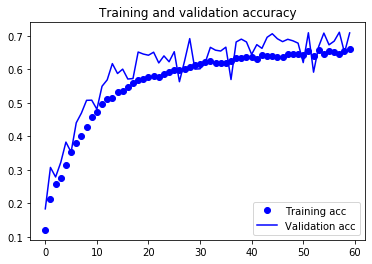

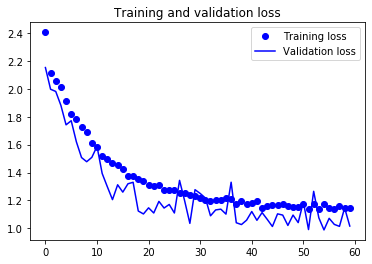

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [3]:
# InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.summary()









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
co

In [4]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == "mixed4":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [5]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

batch_normalization_64 (BatchNo (None, 7, 7, 192)    576         conv2d_64[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 7, 7, 192)    576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 7, 7, 192)    576         conv2d_70[0][0]                  
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 7, 7, 192)    0           batch_normalization_61[0][0]     
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 7, 7, 192)    0           batch_normalization_64[0][0]     
__________________________________________________________________________________________________
activation

#### If you want to set InceptionV3 base as not trainable, run this block directly

In [24]:
# Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False

print("Before")
print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
print("After")
model.summary()

Before
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 26,524,202
Trainable params: 4,721,418
Non-trainable params: 21,802,784
_________________________________________________________________
None
After
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
______________________________________

#### Run this block if you unfreezed any layer of the InceptionV3 base model

In [6]:
# Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 1, 1, 128)         2359424   
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
___________________________

In [7]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=60,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
375/375 [==============================] - 93s 247ms/step - loss: 16.4195 - acc: 0.1380 - val_loss: 16.2200 - val_acc: 0.2145
Epoch 2/60
375/375 [==============================] - 83s 222ms/step - loss: 16.0944 - acc: 0.2395 - val_loss: 15.8262 - val_acc: 0.3345
Epoch 3/60
375/375 [==============================] - 85s 227ms/step - loss: 15.7289 - acc: 0.3347 - val_loss: 15.3626 - val_acc: 0.4660
Epoch 4/60
375/375 [==============================] - 85s 227ms/step - loss: 15.3596 - acc: 0.4167 - val_loss: 15.0276 - val_acc: 0.5170
Epoch 5/60
375/375 [==============================] - 85s 228ms/step - loss: 15.0270 - acc: 0.4819 - val_loss: 14.7212 - val_acc: 0.5590
Epoch 6/60
375/375 [==============================] - 86s 229ms/step - loss: 14.7477 - acc: 0.5272 - val_loss: 14.4693 - val_acc: 0.5985
Epoch 7/60
375/375 [==============================] - 86s 229ms/step - loss: 14.5016

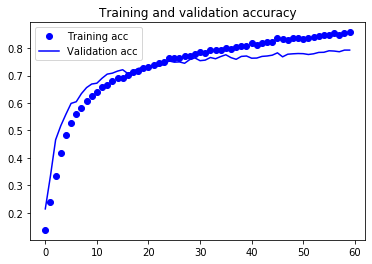

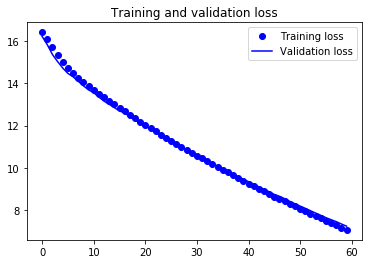

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Save the Model
model.save('food_model_2.h5')

### Model #3 (ResNet50)

In [3]:
conv_base = ResNet50(include_top=False,
                     weights='imagenet',
                     input_shape=(img_size, img_size, 3))
conv_base.summary()

D:\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [4]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == "add_12":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [5]:
# Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.002), bias_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 128)         2359424   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               590336    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
___________________________

In [6]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
375/375 [==============================] - 94s 250ms/step - loss: 21.7952 - acc: 0.3768 - val_loss: 20.8626 - val_acc: 0.6485
Epoch 2/20
375/375 [==============================] - 90s 241ms/step - loss: 20.8626 - acc: 0.6073 - val_loss: 20.3641 - val_acc: 0.7310
Epoch 3/20
375/375 [==============================] - 92s 246ms/step - loss: 20.4069 - acc: 0.6723 - val_loss: 20.0219 - val_acc: 0.7635
Epoch 4/20
375/375 [==============================] - 93s 249ms/step - loss: 20.0329 - acc: 0.7084 - val_loss: 19.7007 - val_acc: 0.7755
Epoch 5/20
375/375 [==============================] - 94s 250ms/step - loss: 19.6756 - acc: 0.7375 - val_loss: 19.4054 - val_acc: 0.7870
Epoch 6/20
375/375 [==============================] - 95s 252ms/step - loss: 19.3733 - acc: 0.7460 - val_loss: 19.1058 - val_acc: 0.7975
Epoch 7/20
375/375 [==============================] - 95s 252ms/step - loss: 19.0317

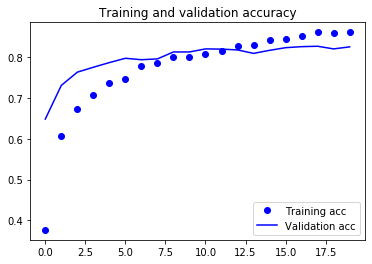

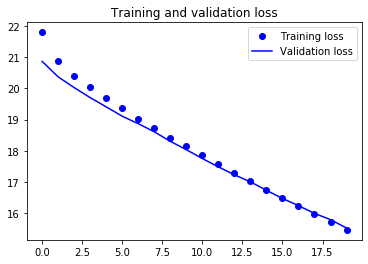

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
# Save the Model
model.save('food_model_3.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [9]:
# Model #1
model.load_weights('food_model_1.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


test_loss: 1.0248317766189574
test_acc: 0.7019999980926513


In [10]:
# Model #2
model.load_weights('food_model_2.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


test_loss: 7.223895339965821
test_acc: 0.8019999957084656


In [9]:
# Model #3
model.load_weights('food_model_3.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


test_loss: 15.577114524841308
test_acc: 0.8099999952316285


In [11]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [12]:
# Load the model
model.load_weights('food_model_best.h5')

In [13]:
# Load the food list (in alphabetical order)
with open('19.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_carpaccio', 'beet_salad', 'croque_madame', 'frozen_yogurt', 'grilled_cheese_sandwich', 'grilled_salmon', 'lobster_bisque', 'omelette', 'red_velvet_cake', 'risotto']


In [14]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

def resnet_image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image_array = preprocess_input(image_array)
    return preprocessed_image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

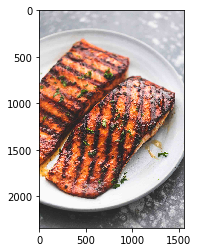

The prediction is:  grilled_salmon 

    beef_carpaccio  beet_salad  croque_madame  frozen_yogurt  \
0        0.000006    0.000003       0.000004   1.261423e-07   

   grilled_cheese_sandwich  grilled_salmon  lobster_bisque  omelette  \
0                 0.000016        0.999892    2.381131e-08  0.000073   

   red_velvet_cake   risotto  
0         0.000001  0.000005  


In [15]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'salmon1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

### For ResNet50

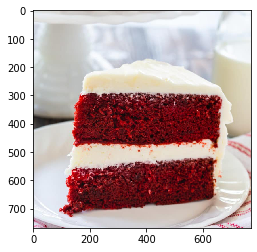

The prediction is:  beet_salad 

    beef_carpaccio  beet_salad  croque_madame  frozen_yogurt  \
0         0.13211    0.537535       0.019548       0.043807   

   grilled_cheese_sandwich  grilled_salmon  lobster_bisque  omelette  \
0                 0.029484        0.052291        0.029708  0.029779   

   red_velvet_cake   risotto  
0         0.037643  0.088094  


In [17]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'cake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = resnet_image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)